# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ragil Ahmad Faa'iz
- **Email:** ragilahmadfaaiz@gmail.com
- **ID Dicoding:** ragilahmadfaaiz

## Menentukan Pertanyaan Bisnis

- Apakah perubahan musim berpengaruh pada penyewaan sepeda ?
- Pada jam berapa penyewaan sepeda mencapai "peak" nya ?
- Bagaimana tren penyewaan sepeda pada saat hari biasa, liburan atau hari kerja  

## Import Semua Packages/Library yang Digunakan

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [54]:
# Ekstrak file dataset Bike Sharing Dataset
# Terdapat 2 dataset yaitu day.csv dan hour.csv
import zipfile
zip_ref = zipfile.ZipFile('/content/Bike-sharing-dataset.zip', 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

In [55]:
# Tampilkan dataset day.csv
day_data = pd.read_csv('/content/data/day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [56]:
# Tampilkan dataset hour.csv
hour_data = pd.read_csv('/content/data/hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Beberapa record diwakili oleh angka yang di normalisasi untuk menunjukan varian. Hal ini membuat kebingungan saat membaca dataset
- Beberapa kolom memiliki nama yang membingungkan dan kurang detail

### Assessing Data

1. Menilai Data day_data

In [57]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam day_data. Proses ini dapat dilakukan menggunakan method info()
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [58]:
# Memastikan tidak ada kolom yang memiliki missing value
day_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [59]:
# Periksa Duplikasi Data
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


In [60]:
# Melihat Parameter Statistik masing-masing kolom
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [61]:
# Menampilkan jumlah setiap musim
season_counts = day_data['season'].value_counts()
print("Jumlah data per musim:")
print(season_counts)

Jumlah data per musim:
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64


In [62]:
# Menampilkan jumlah setiap musim
season_counts = day_data['weekday'].value_counts()
print("Jumlah data penyewaan sepeda di hari biasa:")
print(season_counts)

Jumlah data penyewaan sepeda di hari biasa:
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64


In [63]:
# Menampilkan jumlah setiap musim
season_counts = day_data['holiday'].value_counts()
print("Jumlah data per musim:")
print(season_counts)

Jumlah data per musim:
holiday
0    710
1     21
Name: count, dtype: int64


In [64]:
# Menampilkan jumlah setiap musim
season_counts = day_data['mnth'].value_counts()
print("Jumlah data per musim:")
print(season_counts)

Jumlah data per musim:
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64


In [65]:
# Menampilkan jumlah setiap musim
season_counts = day_data['workingday'].value_counts()
print("Jumlah data per musim:")
print(season_counts)

Jumlah data per musim:
workingday
1    500
0    231
Name: count, dtype: int64


In [66]:
# Menampilkan jumlah setiap musim
season_counts = day_data['weathersit'].value_counts()
print("Jumlah data per musim:")
print(season_counts)

Jumlah data per musim:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64


2. Menilai Data hour_day

In [67]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_data. Proses ini dapat dilakukan menggunakan method info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [68]:
# Memastikan tidak ada kolom yang memiliki missing value
hour_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [69]:
# Periksa Duplikasi Data
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


In [70]:
# Melihat Parameter Statistik masing-masing kolom
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [71]:
season_counts = hour_data['hr'].value_counts()
print("Jumlah data per musim:")
print(season_counts)

Jumlah data per musim:
hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64


**Insight:**
- Kedua data tidak memiliki kolom dengan record yang null dan duplicated, sehingga tidak perlu melakukan drop atau imputation pada dataset.
- Kolom instan perlu dihapus, karena kolom tersebut hanya sebagai index masing record dan tidak ada makna untuk di analisis
- Kolom dteday akan diubah ke format tanggal untuk analisis waktu
- Beberapa kolom memiliki nama yang membingungkan, sehingga perlu dilakukan perubahan nama kolom agar terbaca dengan jelas. Dalam kasus ini ada kolom "dteday", "yr", "mnth", "hr", "weathersit"
- Beberapa kolom menggunakan angka yang di normalisasi untuk mewakili record varian kategori. Jadi perlu diubah ubah dari int ke category
- Pada data day_data, dilakukan perubahan pada kolom "season", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "cnt"
- Pada data hour_data, kolom yang diubah sama seperti pada data day_data hanya tambahan kolom "hr" yang perlu diubah

### Cleaning Data

1. Menghapus Kolom "instant"

In [72]:
# day_data
day_data.drop(['instant'], axis = 1, inplace= True)

# hour_day
hour_data.drop(['instant'], axis = 1, inplace= True)

2. Mengubah tipe data kolom "dteday" menjadi datetime

In [73]:
# day_data
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# hour_data
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

3. Mengubah nama beberapa kolom

In [74]:
# day_data
day_data.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

# hour_data
hour_data.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

4. Mengubah tipe data beberapa kolom menjadi kategori

In [75]:
# day_data
day_data['season'] = day_data['season'].astype('category')
day_data['month'] = day_data['month'].astype('category')
day_data['year'] = day_data['year'].astype('category')
day_data['holiday'] = day_data['holiday'].astype('category')
day_data['weekday'] = day_data['weekday'].astype('category')
day_data['workingday'] = day_data['workingday'].astype('category')
day_data['weather_condition'] = day_data['weather_condition'].astype('category')

# hour_day
hour_data['season'] = hour_data['season'].astype('category')
hour_data['month'] = hour_data['month'].astype('category')
hour_data['year'] = hour_data['year'].astype('category')
hour_data['holiday'] = hour_data['holiday'].astype('category')
hour_data['weekday'] = hour_data['weekday'].astype('category')
hour_data['workingday'] = hour_data['workingday'].astype('category')
hour_data['weather_condition'] = hour_data['weather_condition'].astype('category')

5. Mengkonversi record menjadi varian kategori yang mudah dibaca

In [76]:
# day_data
day_data['season'] = day_data['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

day_data['month'] = day_data['month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

day_data['weekday'] = day_data['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

day_data['year'] = day_data['year'].map({
    0: '2011',
    1: '2012'
})

day_data['weather_condition'] = day_data['weather_condition'].map({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
})

# hour_data
hour_data['season'] = hour_data['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

hour_data['month'] = hour_data['month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

hour_data['weekday'] = hour_data['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

hour_data['year'] = hour_data['year'].map({
    0: '2011',
    1: '2012'
})

hour_data['weather_condition'] = hour_data['weather_condition'].map({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
})

In [77]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 731 non-null    datetime64[ns]
 1   season               731 non-null    category      
 2   year                 731 non-null    category      
 3   month                731 non-null    category      
 4   holiday              731 non-null    category      
 5   weekday              731 non-null    category      
 6   workingday           731 non-null    category      
 7   weather_condition    731 non-null    category      
 8   temperature          731 non-null    float64       
 9   feeling_temperature  731 non-null    float64       
 10  humidity             731 non-null    float64       
 11  windspeed            731 non-null    float64       
 12  casual               731 non-null    int64         
 13  registered           731 non-null  

In [78]:
day_data.head()

,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 17379 non-null  datetime64[ns]
 1   season               17379 non-null  category      
 2   year                 17379 non-null  category      
 3   month                17379 non-null  category      
 4   hour                 17379 non-null  int64         
 5   holiday              17379 non-null  category      
 6   weekday              17379 non-null  category      
 7   workingday           17379 non-null  category      
 8   weather_condition    17379 non-null  category      
 9   temperature          17379 non-null  float64       
 10  feeling_temperature  17379 non-null  float64       
 11  humidity             17379 non-null  float64       
 12  windspeed            17379 non-null  float64       
 13  casual               17379 non-

In [80]:
hour_data.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kolom "instant" berhasil dihapus
- Tipe data pada kolom "dteday" telah berubah menjadi datetime karena record pada kolom tersebut berisi sebuah tanggalan
- Beberapa nama kolom diubah menjadi lebih detail agar menghindari kebingungan saat membaca nama kolom
- Selain kolom "dteday" yang di ubah tipe datanya, ada beberapa kolom dalam dataset "day_data" dan "hour_data" yang tipe data nya diubah menjadi category
- Beberapa kolom yang menggambarkan varian namun digambarkan dalam bentuk angka yang dinormalisasi, telah berhasil di konversi agar mudah dibaca.


## Exploratory Data Analysis (EDA)

### 1. Explore data day_data

In [81]:
day_data.describe(include="all")

,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
count,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,January,0.0,Sunday,1.0,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [82]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul
day_data.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

<ipython-input-82-f54366ebb942>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_data.groupby(by="year").agg({


,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Pengguna sepeda mengalami kenaikan dari tahun 2011 ke 2012. Memiliki pola pengguna yang sama, yaitu pengguna registered lebih banyak dari pengguna casual

In [83]:
# Grouping data berdasarkan 'season' dan 'weather_condition' lalu menghitung rata-rata 'count'
season_weather_group = day_data.groupby('season')['count'].mean().reset_index()
# Mengurutkan 'season' sesuai abjad
season_weather_group['season'] = pd.Categorical(season_weather_group['season'], categories=sorted(season_weather_group['season'].unique()), ordered=True)
print(season_weather_group)

   season        count
0  Spring  2604.132597
1  Summer  4992.331522
2    Fall  5644.303191
3  Winter  4728.162921


<ipython-input-83-339773c60f29>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_weather_group = day_data.groupby('season')['count'].mean().reset_index()


Aktivitas penyewaan sepeda paling banyak terjadi pada musim gugur atau fall, lalu musim dimana sedikit terjadi aktivitas penyewaan sepeda pada musim spring atau semi

In [84]:
# Menghitung rata-rata registered dan casual berdasarkan kategori (weekday, workingday, holiday)
weekday_avg = day_data.groupby('weekday')[['registered', 'casual']].mean().mean()
workingday_avg = day_data.groupby('workingday')[['registered', 'casual']].mean().mean()
holiday_avg = day_data.groupby('holiday')[['registered', 'casual']].mean().mean()

print(weekday_avg)
print(workingday_avg)
print(holiday_avg)

registered    3657.997514
casual         846.894662
dtype: float64
registered    3468.642316
casual         988.852100
dtype: float64
registered    3177.809054
casual         953.243058
dtype: float64


<ipython-input-84-fe43c9c5a8cf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = day_data.groupby('weekday')[['registered', 'casual']].mean().mean()
<ipython-input-84-fe43c9c5a8cf>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_avg = day_data.groupby('workingday')[['registered', 'casual']].mean().mean()
<ipython-input-84-fe43c9c5a8cf>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_avg

User registered mendominasi penggunaan sepeda baik waktu kerja, weekend, atau holiday

### 2. Explore data hour_data

In [85]:
hour_data.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,feeling_temperature,humidity,windspeed,casual,registered,count
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,0.0,Saturday,1.0,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [86]:
# Mengelompokkan data berdasarkan 'hour' untuk pengguna terdaftar (registered) dan santai (casual)
hourly_registered = hour_data.groupby('hour')['registered'].mean()
hourly_casual = hour_data.groupby('hour')['casual'].mean()

print(hourly_registered)
print(hourly_casual)

hour
0      43.739669
1      26.871547
2      18.097902
3       9.011478
4       5.098996
5      18.478382
6      71.882759
7     201.009629
8     337.331499
9     188.418157
10    127.191197
11    148.602476
12    185.021978
13    181.352538
14    165.381344
15    176.327846
16    238.238356
17    387.178082
18    364.390110
19    262.752747
20    189.796703
21    144.059066
22    109.082418
23     72.631868
Name: registered, dtype: float64
hour
0     10.158402
1      6.504144
2      4.772028
3      2.715925
4      1.253945
5      1.411437
6      4.161379
7     11.055021
8     21.679505
9     30.891334
10    46.477304
11    59.540578
12    68.293956
13    72.308642
14    75.567901
15    74.905350
16    73.745205
17    74.273973
18    61.120879
19    48.770604
20    36.233516
21    28.255495
22    22.252747
23    15.199176
Name: casual, dtype: float64


**Insight:**
- Berdasarkan hasil grouping data berdasarkan 'season' dan menghitung total penyewaan sepeda ('count') di atas menunjukan bahwa user registered mendominasi penyewaan sepeda baik itu di weekday, holiday, ataupun workday
- Berdasarkan hasl grouping data berdasarkan 'year' dan 'month', lalu menghitung total penjualan ('count') penyewaan perbulan tahun 2011 dan 2012, menunjukan bahwa user penyewaan sepeda tahun 2012 lebih banyak dari tahun sebelumnya. Hal yang sama terjadi seperti tahun sebelumnya, yaitu jumal user registered dan casual memiliki selisih yang cukup jauh dimana user registered lebih banyak
- Berdasarkan hasil menghitung rata-rata registered dan casual berdasarkan kategori (weekday, workingday, holiday) di atas menunjukan bahwa user registered mendominasi penyewaan sepeda baik itu di weekday, holiday, ataupun workday
- Hasil grouped data berdasarkan 'hour' untuk pengguna terdaftar (registered) dan santai (casual) menunjukan bahwa penyewaan sepeda mencapai "peak" nya terjadi pada jam 17 atau 5 sore baik itu pada user registered maupun user casual

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah perubahan musim berpengaruh pada penyewaan sepeda ?

<ipython-input-87-423ccddba9a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


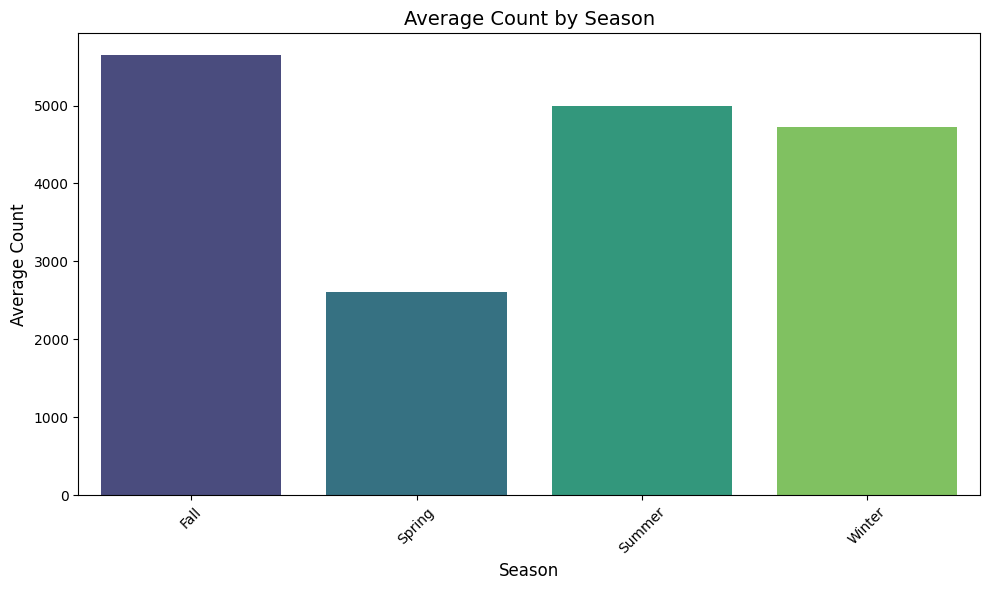

In [87]:
# Membuat bar chart
plt.figure(figsize=(10, 6))

sns.barplot(
    data=season_weather_group,
    x='season',
    y='count',
    palette='viridis'
)

# Menambahkan judul dan label
plt.title('Average Count by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Count', fontsize=12)
plt.xticks(rotation=45)  # Rotasi label pada sumbu X agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan chart
plt.show()

Berdasarkan hasil visualisasi, perubahan musim mempengaruhi aktivitas penyewaan sepeda. Musim fall atau gugur menjadi musim dengan aktivitas penyewaan sepeda paling tinggi disekitar 5600. Musim dengan aktivitas penyewaan sepeda paling sedikit yaitu di musim semi

### Pertanyaan 2: Pada jam berapa penyewaan sepeda mencapai "peak" nya ?

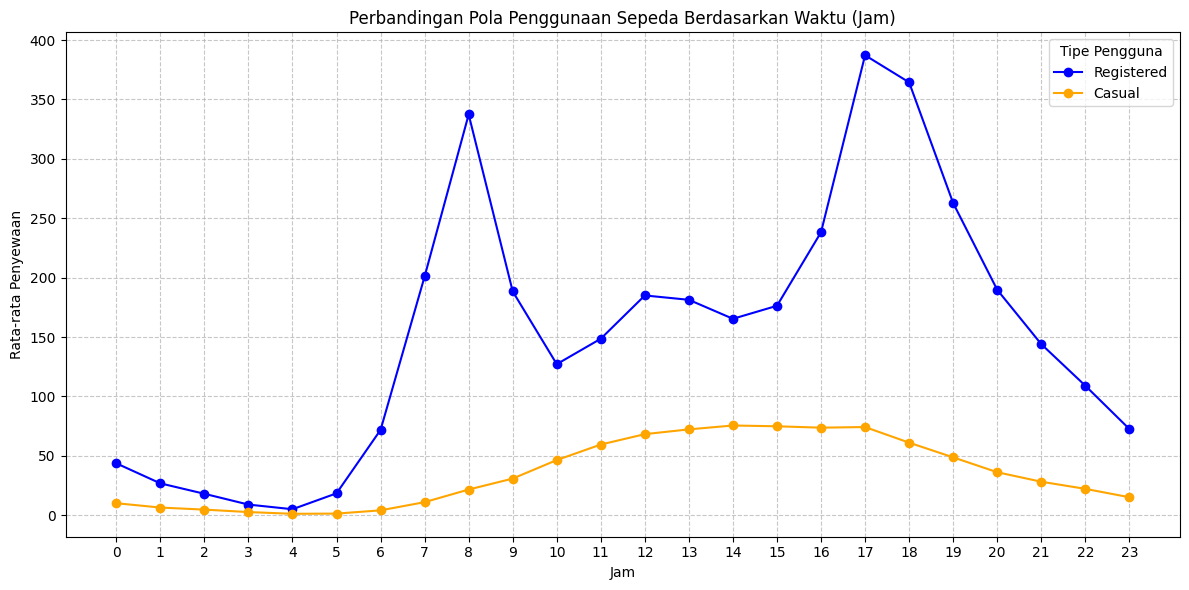

In [88]:
# Membuat line chart untuk membandingkan pola waktu pengguna
plt.figure(figsize=(12, 6))
plt.plot(hourly_registered, label='Registered', marker='o', color='blue')
plt.plot(hourly_casual, label='Casual', marker='o', color='orange')

# Menambahkan judul, label, dan legend
plt.title('Perbandingan Pola Penggunaan Sepeda Berdasarkan Waktu (Jam)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Tipe Pengguna')
plt.grid(axis='both', linestyle='--', alpha=0.7)  # Menambahkan grid untuk membantu pembacaan
plt.xticks(range(0, 24))  # Memastikan semua jam (0-23) terlihat
plt.tight_layout()
plt.show()

Hasil visualisasi dari line chart menunjukkan bahwa aktivitas penyewaan sepeda paling sering terjadi di jam 5 sore dan didominasi oleh user "Registered". Hal yang sama terjadi pada user "casual" yang pada jam 5 memiliki aktivitas penyewaan yang tinggi. Selain itu bisa kita simpulkan bahwa pengguna penyewaan sepeda di dominasi oleh user "Registered"

### Pertanyaan 3 : Bagaimana tren penyewaan sepeda pada saat hari biasa, liburan atau hari kerja

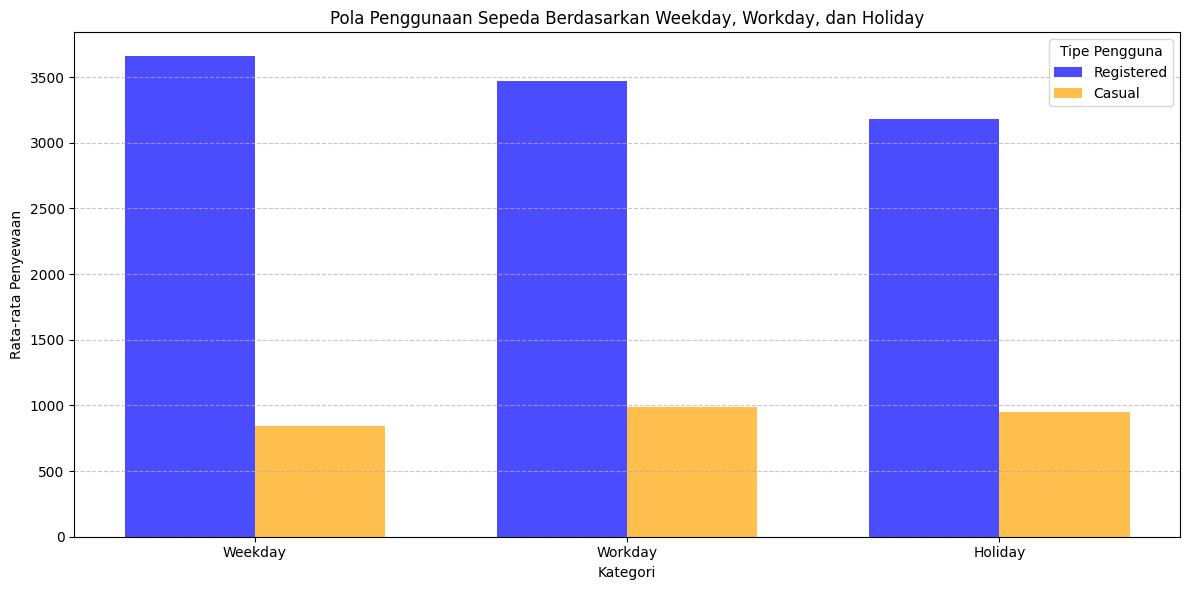

In [89]:
# Menyusun data untuk plotting
categories = ['Weekday', 'Workday', 'Holiday']
registered_avg = [weekday_avg['registered'], workingday_avg['registered'], holiday_avg['registered']]
casual_avg = [weekday_avg['casual'], workingday_avg['casual'], holiday_avg['casual']]

x = np.arange(len(categories))  # Posisi untuk kategori
width = 0.35  # Lebar bar

# Membuat bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, registered_avg, width, label='Registered', color='blue', alpha=0.7)
plt.bar(x + width/2, casual_avg, width, label='Casual', color='orange', alpha=0.7)

# Menambahkan label dan legend
plt.xticks(x, categories)
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Pola Penggunaan Sepeda Berdasarkan Weekday, Workday, dan Holiday')
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Grafik ini menunjukkan pola penggunaan sepeda berdasarkan kategori weekday, workday, dan holiday dengan perbandingan antara pengguna registered dan casual. Pada weekday dan workday, pengguna registered memiliki rata-rata penyewaan yang jauh lebih tinggi dibandingkan pengguna casual, mengindikasikan bahwa pengguna registered lebih sering menggunakan sepeda untuk keperluan rutin seperti bekerja atau bersekolah. Sebaliknya, pada hari libur (holiday), pengguna casual terlihat lebih aktif menyewa sepeda, meskipun pengguna registered tetap mendominasi. Pola ini menunjukkan bahwa pengguna casual cenderung menggunakan sepeda untuk tujuan rekreasi atau santai pada hari libur, sementara pengguna registered memanfaatkan sepeda terutama pada hari kerja

**Insight:**
- Pergantian musim berpengaruh pada aktivitas penyewaan sepeda. Sebab hasil visualisasi menampilkan perbedaan aktivitas penyewaan sepeda dari 4 musim berbeda dengan musim gugur sebagai musim dengan aktivitas penyewaan sepeda paling banyak
- User registered dan casual memiliki pola penggunaan berbeda. Peak dari penyewaan sepeda dari user regiestered terdapat pada 2 waktu, yaitu di jam 8 pagi dan jam 5 sore. Sedangkan peak penggunaan sepeda pada waktu siang sampai sore di jam 12 siang sampai jam 5 sore
- User registered mendominasi aktivitas penyewaan sepeda baik di hari libur, kerja, ataupun hari biasa

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Penyewaan sepeda mengikuti pola musiman yang kuat, dengan peningkatan di musim panas dan penurunan di musim dingin. Hal ini mungkin disebabkan oleh berbagai faktor, seperti cuaca yang lebih sejuk dan kondisi yang lebih nyaman untuk bersepeda di musim gugur, sementara di musim semi, cuaca yang masih belum stabil atau terlalu dingin dapat mengurangi minat orang untuk menggunakan sepeda.
- Conclusion pertanyaan 2 : aktivitas penyewaan sepeda didominasi oleh pengguna Registered, dengan pola penggunaan yang jelas terkait dengan waktu pagi dan sore hari. Puncak penyewaan terjadi pada pukul 7-8 pagi, kemungkinan terkait perjalanan ke kantor atau sekolah, dan kembali meningkat pada pukul 17 sore, yang mungkin mencerminkan perjalanan pulang. Sementara itu, aktivitas pengguna Casual cenderung lebih stabil sepanjang hari, dengan sedikit peningkatan menjelang sore. Meskipun demikian, jumlah penyewaan oleh pengguna Casual tetap jauh lebih rendah dibandingkan pengguna Registered. Secara keseluruhan, waktu paling sibuk untuk penyewaan sepeda adalah pukul 17 sore, yang menjadi puncak aktivitas dari kedua jenis pengguna
- Conclusion pertanyaan 3 : Pengguna registered lebih sering menyewa sepeda pada weekday dan workday, menunjukkan bahwa mereka menggunakan sepeda untuk keperluan rutin. Pengguna casual cenderung lebih banyak menyewa sepeda pada hari libur, menunjukkan penggunaan sepeda untuk tujuan rekreasi atau santai.

In [90]:
day_data.to_csv("day_clean_data.csv", index=False)

In [91]:
hour_data.to_csv("hour_clean_data.csv", index=False)